In [1]:
from PIL import Image

### Load and show an image

In [2]:
img = Image.open("simba.png")

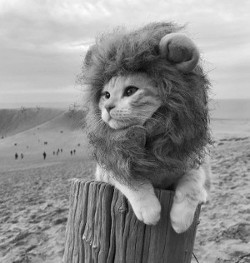

In [32]:
# img.show() # <-- console
display(img) # <-- jupyter notebook

### Get width and height

In [6]:
w, h = img.size

print(f"Widht:{w}px, Heigh:{h}px")

Widht:250px, Heigh:263px


In [9]:
print(f"Pixels' format: {img.mode}")

Pixels' format: L


'L' means that the intensity is coded with 8 bits, which is 2^8=256

All formats are here: https://pillow.readthedocs.io/en/stable/handbook/concepts.html#modes

In [13]:
coords = (1,1)
px_value = img.getpixel(coords)
print(f"The intensity of pixel {coords} is {px_value}")

The intensity of pixel (1, 1) is 244


### Working with numpy

In [14]:
import numpy as np

In [15]:
mat = np.array(img)

In [16]:
print(f"The numpy matrix shape is: {mat.shape}")

The numpy matrix shape is: (263, 250)


In [17]:
mat

array([[247, 245, 245, ..., 224, 228, 228],
       [246, 244, 243, ..., 228, 230, 230],
       [244, 242, 240, ..., 230, 231, 231],
       ...,
       [183, 169, 169, ..., 108,  95, 102],
       [170, 160, 171, ...,  81,  95,  99],
       [150, 155, 174, ..., 133, 115, 111]], dtype=uint8)

### Working with matplotlib

In [18]:
import matplotlib.pyplot as plt

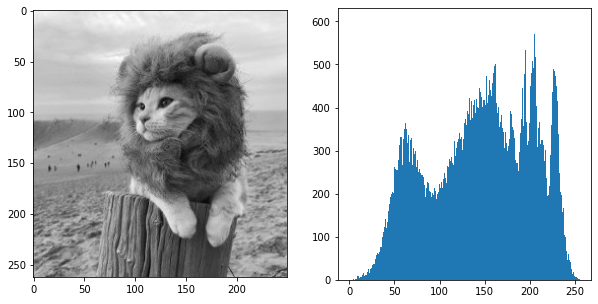

In [65]:
fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(mat, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.hist(mat.flatten(), bins=range(256))
plt.show()

L'**histogramme** d'une image numérique est une courbe statistique représentant la répartition de ses pixels selon leur intensité. Pour une image en noir et blanc, il indique en abscisse le niveau de gris (entier entre 0 et 255) et en ordonnée, le nombre de pixels ayant cette valeur.

Lorsque l'histogramme est **normalisé**, il indique en ordonnée la probabilité pi de trouver un pixel de niveau de gris i dans l'image. (ce n'est pas le cas ci-dessus)

Un **histogramme cumulé normalisé** calcule le pourcentage de pixels ayant une valeur inférieure à un niveau de gris donné. (ce n'est pas le cas ci-dessus)

## Etirement de l'histogramme

### Sous-exposition

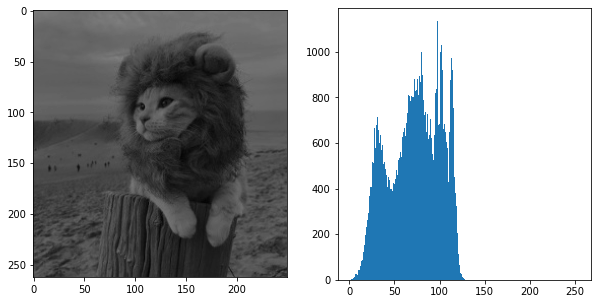

In [66]:
mat2 = mat/2.0

fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(mat2, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.hist(mat2.flatten(), bins=range(256))
plt.show()

### Sur-exposition

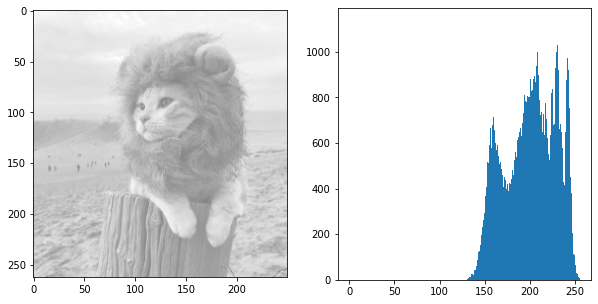

In [69]:
mat3 = mat2+128

fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(mat3, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.hist(mat3.flatten(), bins=range(256))
plt.show()

### Correction de l'histogramme par étirement

 Pour corriger les défauts liés à l’exposition d'une image, il suffit simplement d'étirer son histogramme : l'objectif est d'étendre les valeurs des niveaux de gris de l'image mal exposée, majoritairement répartis dans un sous intervalle [Imin,Imax]⊂[0,255], à tout l'intervalle disponible. 

#### Correction de l'image sous-exposée

In [90]:
Imin, Imax = np.min(mat2)-1, np.max(mat2)+1

In [91]:
mat2fix = (255*(mat2 - Imin))/(Imax-Imin)

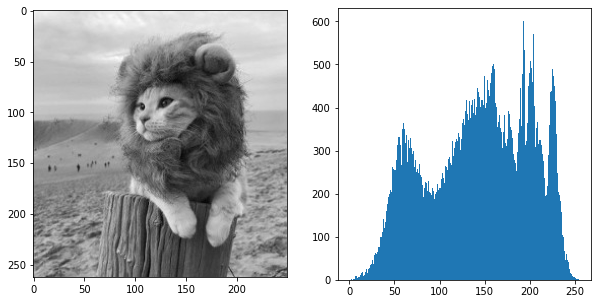

In [92]:
fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(mat2fix, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.hist(mat2fix.flatten(), bins=range(256))
plt.show()

#### Correction de l'image sur-exposée

In [93]:
Imin, Imax = np.min(mat3)-1, np.max(mat3)+1

In [94]:
mat3fix = (255*(mat3 - Imin))/(Imax-Imin)

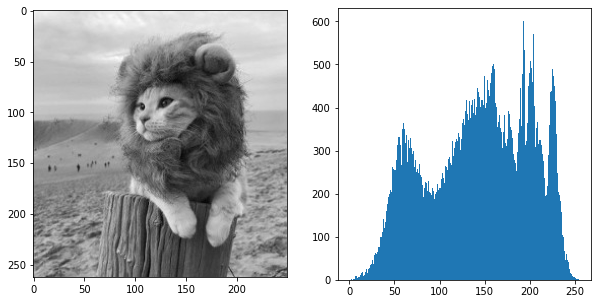

In [95]:
fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(mat3fix, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.hist(mat3fix.flatten(), bins=range(256))
plt.show()

## Egalisation de l'histogramme

### Trop peu contrastée

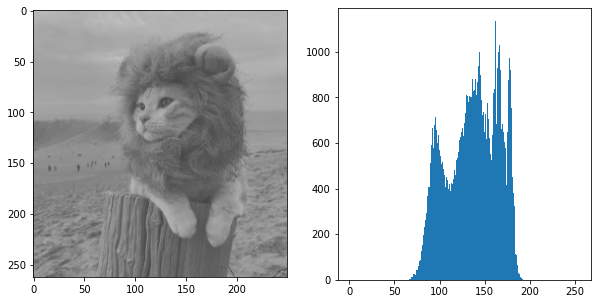

In [97]:
mat4 = mat2+64

fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(mat4, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.hist(mat4.flatten(), bins=range(256))
plt.show()

### Trop contrastée

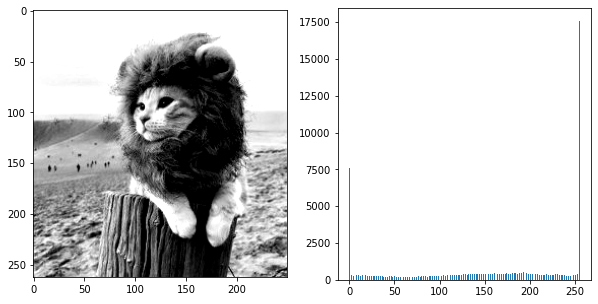

In [149]:
mat5 = np.array(mat, dtype=np.int64)

mat5 = ((mat5-128)*2)+128
mat5 = np.where(mat5 > 255, 255, mat5)
mat5 = np.where(mat5 < 0, 0, mat5)

fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(mat5, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.hist(mat5.flatten(), bins=range(256))
plt.show()

### Correction de l'histogramme par égalisation

## Transformations géometriques

---

In [263]:
from PIL import Image

In [266]:
imgt = Image.open('simba.png')

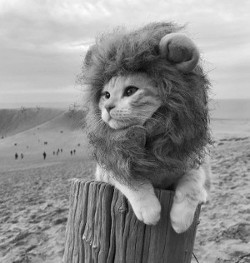

In [267]:
display(imgt)

## Rotation

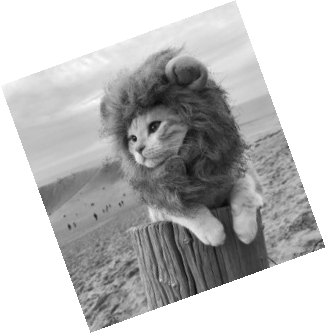

In [276]:
imgt2 = imgt.rotate(20, expand=True, fillcolor='#FFF', resample=Image.BILINEAR)
display(imgt2)

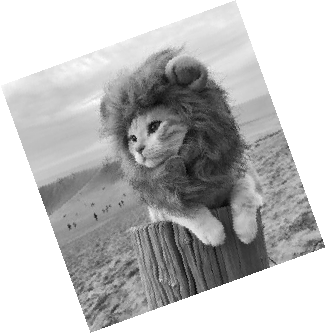

In [277]:
imgt2 = imgt.rotate(20, expand=True, fillcolor='#FFF', resample=Image.NEAREST)
display(imgt2)

## Zoom

In [293]:
def zoom_at(img, x, y, zoom):
    w, h = img.size
    zoom2 = zoom * 2
    img = img.crop((x - w / zoom2, y - h / zoom2, 
                    x + w / zoom2, y + h / zoom2))
    return img.resize((w, h), resample=Image.LANCZOS)

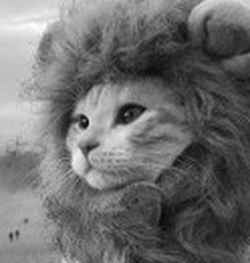

In [294]:
imgt2 = zoom_at(imgt, 128, 100, 2)
display(imgt2)

## Elimination du bruit

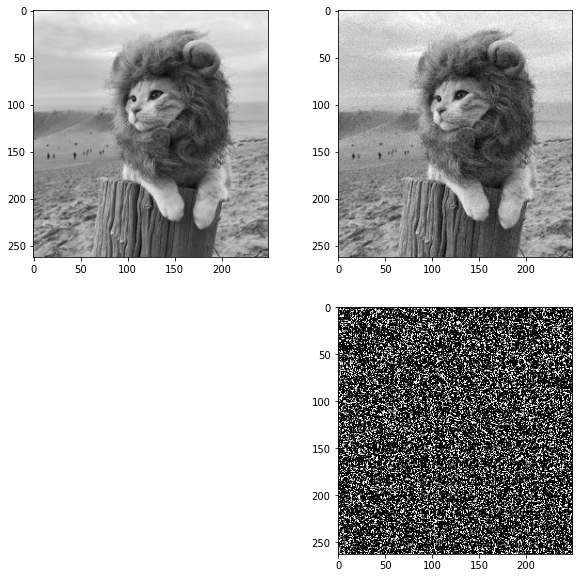

In [319]:
# Charger l'image sous forme d'une matrice de pixels
img = np.array(Image.open('simba.png'))

# Créer une matrice numpy avec l'image originale
mat = np.array(img)

# Générer le bruit gaussien de moyenne nulle et d'écart-type 7 (variance 49)
noise_scale = 7
noise = np.random.normal(0, noise_scale, img.shape)

# Créer l'image bruitée et l'afficher
noisy_img = Image.fromarray(img + noise).convert('L')


fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(mat, cmap='gray', vmin=0, vmax=255)
plt.subplot(2,2,2)
plt.imshow(noisy_img, cmap='gray', vmin=0, vmax=255)
plt.subplot(2,2,4)
plt.imshow(noise, cmap='gray', vmin=0, vmax=noise_scale)
plt.show()

### Correction du bruit avec un Blur

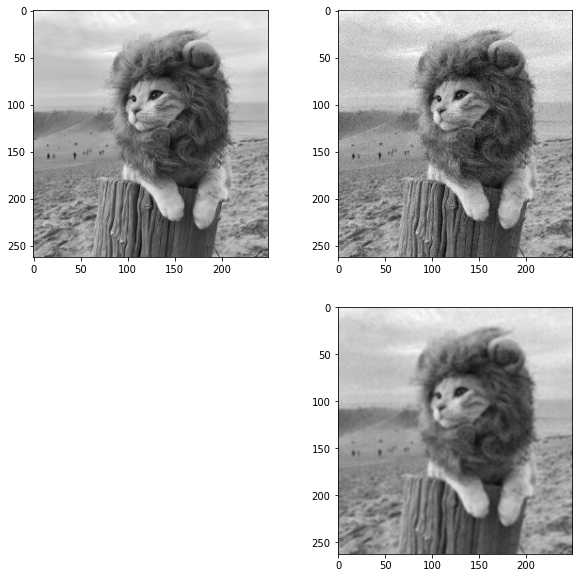

In [323]:
from PIL import ImageFilter

# Appliquer le lissage par moyennage (fenêtre de taille 9) et afficher le résultat
blured_img = noisy_img.filter(ImageFilter.BoxBlur(1))

fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(mat, cmap='gray', vmin=0, vmax=255)
plt.subplot(2,2,2)
plt.imshow(noisy_img, cmap='gray', vmin=0, vmax=255)
plt.subplot(2,2,4)
plt.imshow(blured_img, cmap='gray', vmin=0, vmax=255)
plt.show()

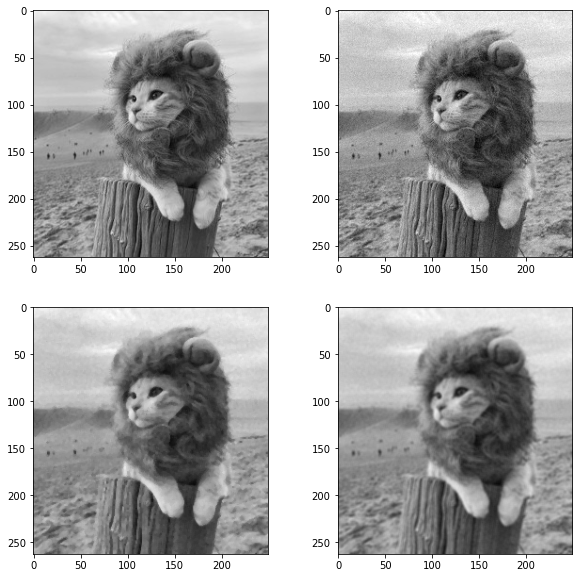

In [338]:
from PIL import ImageFilter

# Appliquer le lissage par moyennage (fenêtre de taille 9) et afficher le résultat
blured2_img = noisy_img.filter(ImageFilter.MedianFilter(3))

fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(mat, cmap='gray', vmin=0, vmax=255)
plt.subplot(2,2,2)
plt.imshow(noisy_img, cmap='gray', vmin=0, vmax=255)
plt.subplot(2,2,3)
plt.imshow(blured2_img, cmap='gray', vmin=0, vmax=255)
plt.subplot(2,2,4)
plt.imshow(blured_img, cmap='gray', vmin=0, vmax=255)
plt.show()

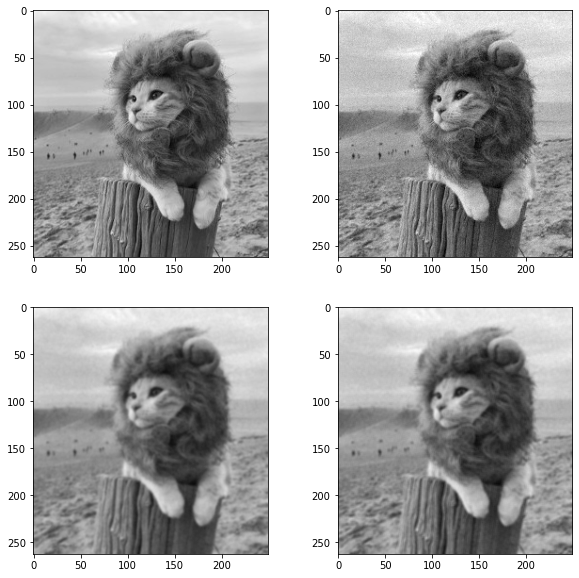

In [340]:
from PIL import ImageFilter

# Appliquer le lissage par moyennage (fenêtre de taille 9) et afficher le résultat
blured3_img = noisy_img.filter(ImageFilter.GaussianBlur(1))

fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(mat, cmap='gray', vmin=0, vmax=255)
plt.subplot(2,2,2)
plt.imshow(noisy_img, cmap='gray', vmin=0, vmax=255)
plt.subplot(2,2,3)
plt.imshow(blured3_img, cmap='gray', vmin=0, vmax=255)
plt.subplot(2,2,4)
plt.imshow(blured_img, cmap='gray', vmin=0, vmax=255)
plt.show()

# TEST ZONE

#### Correction de l'image trop contrastée (TODO !)

In [150]:
from matplotlib import cm

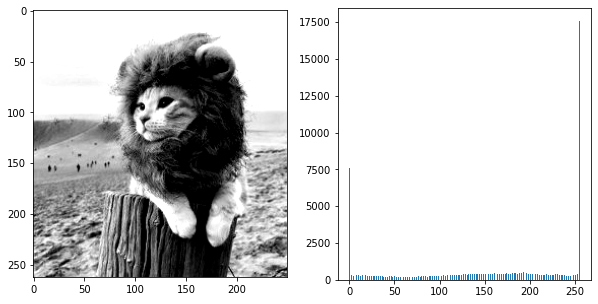

In [167]:
mat5 = np.array(mat, dtype=np.int64)

mat5 = ((mat5-128)*2)+128
mat5 = np.where(mat5 > 255, 255, mat5)
mat5 = np.where(mat5 < 0, 0, mat5)

fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(mat5, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.hist(mat5.flatten(), bins=range(256))
plt.show()

In [191]:
density, bins = np.histogram(mat5, bins=range(256), density=True)
unity_density = density / density.sum()

In [253]:
density.shape

(255,)

In [259]:
new_mat5 = np.zeros(mat5.shape)

for i in range(0, new_mat5.shape[0]):
    for j in range(0, new_mat5.shape[1]):
        new_mat5[i][j] = unity_density[mat5[i][j]-1]*255.0

In [260]:
new_mat5

array([[68.16547529, 68.16547529, 68.16547529, ..., 68.16547529,
        68.16547529, 68.16547529],
       [68.16547529, 68.16547529, 68.16547529, ..., 68.16547529,
        68.16547529, 68.16547529],
       [68.16547529, 68.16547529, 68.16547529, ..., 68.16547529,
        68.16547529, 68.16547529],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [261]:
mat5

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [238, 210, 210, ...,  88,  62,  76],
       [212, 192, 214, ...,  34,  62,  70],
       [172, 182, 220, ..., 138, 102,  94]])

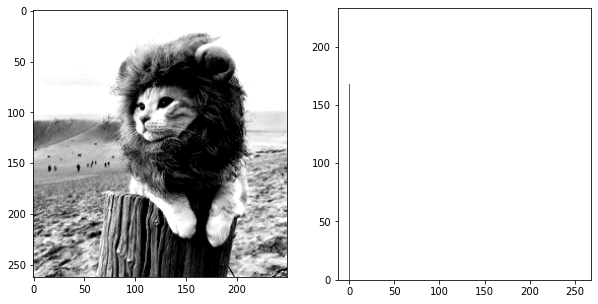

In [262]:
fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(mat5, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.hist(new_mat5, bins=range(256))
plt.show()